# Seeme Quick Guide - Fastai

This is a quick guide to deploy, use and share your trained [fast.ai](fast.ai) vision models using [SeeMe.ai](https://seeme.ai).

In this guide, we will create, deploy and use a simple Cats and Dogs classifier. 

The focus is getting you up and running with deploying, using and sharing your AI models.

# 0. Disclaimer

* SeeMe.ai is currently in development:
    * During the beta period, you can host one model with up to 1000 monthly predictions for free;
    * We are working on a fair and sustainable pricing (contact [iwantto@seeme.ai](mailto:iwantto@seeme.ai) for more info);
    * We rely on your code of honor for fair use.

# 1. Setup

## 1.1 Where to run your Jupyter Notebooks

Use your preferred platfrom to run your [Jupyter Notebooks](https://jupyter.org/): 

* [Paperspace](https://paperspace.com)
* [Google Colab](https://colab.research.google.com/)
* [The official Fast.ai Docker images](https://hub.docker.com/u/fastdotai)
* [Fast.ai Docker from SeeMe.ai](https://hub.docker.com/repository/docker/seemeai/fastai)
* [Azure](https://azure.microsoft.com)
* ...

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.10.0


In [2]:
# Optionally, instal the latest version of fasti
!pip install --upgrade -qqq fastai

In [3]:
import fastai
print(f"fastai version: {fastai.__version__}")

fastai version: 2.6.0


## 1.2 SeeMe.ai Python SDK

Install the [SeeMe SDK](https://pypi.org/project/seeme/) from the command line:

```bash
$ pip install --upgrade --no-cache-dir seeme
```

or in your Notebook:

In [4]:
# Install the SeeMe SDK from your notebook.
!pip install -qqq --upgrade --no-cache-dir seeme

# 2. Train a model

## 2.1 Train our Cats vs dogs model

Here we will train a basic Cats vs Dogs model, using the defaults from fastai.

In [5]:
# Import the vision modules
from fastai.vision.all import *

In [6]:
torch.cuda.set_device(0)

In [7]:
# get the `catsdogs` dataset
path = untar_data(URLs.DOGS)

In [8]:
# have a look at the folder
path.ls()

(#5) [Path('/root/.fastai/data/dogscats/train'),Path('/root/.fastai/data/dogscats/sample'),Path('/root/.fastai/data/dogscats/test1'),Path('/root/.fastai/data/dogscats/export.pkl'),Path('/root/.fastai/data/dogscats/valid')]

In [9]:
# Create the dataloaders
# for more details check the fast.ai courses
dls = ImageDataLoaders.from_folder(path, seed=12, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=297), bs=24)

In [10]:
# Create your model
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()

In [11]:
# Fine tune your model
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.046208,0.024270,0.008000,01:54


In [12]:
learn.unfreeze()

In [13]:
# Fine tune your model
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.134825,0.073909,0.028000,02:20


## 2.2 Test our model locally

Let's see what our model says about one of the test pictures it has never seen.

In [14]:
image_location = str(path/"test1/10789.jpg")

In [15]:
# Find an image to test our model with
img = PILImage.create(image_location)

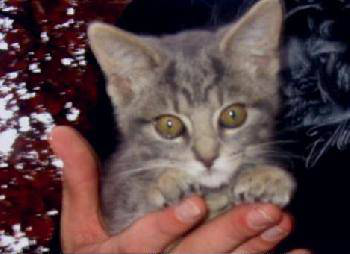

In [16]:
# Pretty clear for us humans
img

In [17]:
# Let's see what our model thinks
learn.predict(img)

('cats', TensorBase(0), TensorBase([0.9959, 0.0041]))

# 3. Deployment - SeeMe.ai

Once you have trained your model, it's time to get it into production.

## 3.1 Export your model

In [18]:
# Put your model in eval model
learn.model.eval();

In [19]:
learn.export()

## 3.2 Setup SeeMe SDK: Import, Register, Login

In [20]:
# Import the SeeMe client
from seeme import Client

In [21]:
# Create a SeeMe client
client = Client()

In [ ]:
# If you haven't already registered, follow these steps:
my_password =  # example: "supersecurepasswordfromonepassword"
my_username =  # example: "janvdp"
my_email =  # example: "jan@seeme.ai"
my_firstname =  # example: "Jan"
my_name =  # example: "Van de Poel"

client.register(username=my_username, email=my_email, password=my_password, firstname=my_firstname, name=my_name)

In [ ]:
# Once you have registered, you can log in:
client.login(my_username, my_password);

## 3.3 SeeMe.ai supports different applications and versions

With SeeMe.ai we support different types of AI applications with different frameworks and framework versions. 
To have a look at the supported applications and their capabilities, you can print all the supported applications in the cell below.

We currently support different versions of Fastai and object detection, but more frameworks are coming.

In [42]:
# Get the application_id for your framework (version).
application_id = client.get_application_id(
    base_framework="pytorch",
    framework="fastai",
    base_framework_version=str(torch.__version__),
    framework_version=str(fastai.__version__),
    application="image_classification"
)

In [22]:

model_name = "Cats and dogs classifier"
description = "Created to be used..."

my_model = client.create_model(  {
    "name": model_name,
    "description": description,
    "application_id": application_id,
    "auto_convert": True
})


NameError: name 'application_id' is not defined

## 3.4 Upload your model

In [44]:
# Deploy your exported model.
client.upload_model(my_model["id"], str(path))

# By default this takes the export.pkl created by learn.export(), but you can simply pass in a filename as well.

{'id': '9bee1adc-7b3e-431d-828b-2faac4d5e767',
 'created_at': '2022-04-25T12:59:13.466248+02:00',
 'updated_at': '2022-04-25T13:00:07.5175049+02:00',
 'name': '',
 'description': '',
 'model_id': 'ad1b49a6-3541-43f7-8d75-2b6de10e5ac4',
 'classes': '',
 'accuracy': 0,
 'user_id': 'd7159432-f218-44ac-aebe-e5d661d62862',
 'can_inference': True,
 'has_logo': False,
 'logo': '',
 'config': '',
 'application_id': '7dff9f7d-695f-4262-be57-00aa4c882938',
 'version': '1.0',
 'version_number': 1,
 'has_ml_model': True,
 'has_onnx_model': True,
 'has_tflite_model': True,
 'has_labels_file': True,
 'dataset_version_id': '',
 'training_request_id': ''}

**Note**: if you are using the latest version of fastai, the model will automatically be converted to Onnx and CoreML.


## 3.5 Add a logo

In [29]:
# Upload a logo for your model (optional)
client.upload_logo(my_model["id"], folder=str(path/"test1"), filename="19.jpg")

{'id': '4411f360-25b5-4544-8666-a6a25da1bcf3',
 'created_at': '2022-04-13T20:56:40.127365+02:00',
 'updated_at': '2022-04-13T20:57:50.448558472+02:00',
 'name': 'PT 1.10.0 - fa 2.5.6',
 'description': 'Created to be used...',
 'user_id': 'd7159432-f218-44ac-aebe-e5d661d62862',
 'notes': '',
 'has_logo': True,
 'logo': '4411f360-25b5-4544-8666-a6a25da1bcf3.jpg',
 'public': False,
 'shared_with_me': False,
 'active_version_id': 'aad84cda-ef3e-482d-8644-60024cd1eac0',
 'classes': 'Cats and dogs',
 'accuracy': 0,
 'can_inference': True,
 'kind': 'image_classification',
 'config': '',
 'application_id': '9b040987-94da-495f-a96b-e9cd0c60be52',
 'has_ml_model': True,
 'has_onnx_model': True,
 'has_tflite_model': True,
 'has_labels_file': True,
 'auto_convert': True,
 'privacy_enabled': False}

# 4. Use your model

Once your model is deployed, you can use it in a number of ways:

- [Python SDK](https://pypi.org/project/seeme/)
- [Web app](https://app.seeme.ai)
- [iOS - App Store](https://apps.apple.com/us/app/id1443724639)
- [Android - Play Store](https://play.google.com/store/apps/details?id=ai.seeme)

## 4.1 Python SDK

You can now use the [Python SDK](https://pypi.org/project/seeme/) to make predictions from basically anywhere, provided you have:

- SeeMe SDK installed
- Login credentials
- The 'id' of a deployed model
- An image to classiy

😃

In [31]:
#image_location = 
image_location = path/"test1/10789.jpg"

In [32]:
# Here, we will use the Python SDK to classify our test image
result = client.inference(my_model["id"], image_location)

In [33]:
result

{'id': 'd65fe6f9-a3bb-44e5-b586-be120eaa647a',
 'created_at': '2022-04-13T20:57:50.619548883+02:00',
 'updated_at': '2022-04-13T20:57:50.735941397+02:00',
 'name': '10789.jpg',
 'description': '',
 'prediction': 'cats',
 'confidence': 0.83279157,
 'model_id': '4411f360-25b5-4544-8666-a6a25da1bcf3',
 'model_version_id': 'aad84cda-ef3e-482d-8644-60024cd1eac0',
 'extension': 'jpg',
 'user_id': 'd7159432-f218-44ac-aebe-e5d661d62862',
 'error_reported': False,
 'error': '',
 'application_id': '9b040987-94da-495f-a96b-e9cd0c60be52',
 'inference_host': 'image-pt-1-10-0-fa-2-5-6',
 'inference_time': '115.151204ms',
 'end_to_end_time': '',
 'dataset_item_id': '',
 'result': '',
 'inference_items': None,
 'hidden': False,
 'privacy_enabled': False}

In [35]:
# Print out the results
print(result["prediction"])
print(result["confidence"])

cats
0.83279157


Make sure to check if they match the predictions from our model in the notebook.

## 4.2 SeeMe.ai web app

You can open the web app via [app.seeme.ai](https://app.seeme.ai)

Log in if you need to with the credentials used to register (my_username, my_password).

If you've followed the steps above without changing anything, this is what you will see after logging in.

Click on the model to start making predictions.

![SeeMe.ai your model](images/seeme-ai-first-model-cats-dogs-edit.png)

Here is what the detail screen looks like:

![SeeMe.ai first model detail screen](images/seeme-ai-model-detail-screen.png)

Next:

- click on `select image`
- find an image you would like to classify
- click on analyze
- Look at `result` and `confidence` to see what the prediction is.

![SeeMe.ai model prediction example](images/seeme-ai-model-prediction-example.png)

# 4.3 iOS/Android

You can also access all models - yours, shared, and public - on our native mobile apps. You can install them from the [iOS App Store](https://apps.apple.com/us/app/id1443724639) and [Android Play Store](https://play.google.com/store/apps/details?id=ai.seeme).

Once you have logged in, you see the overview of models:

![SeeMe.ai mobile list of models](images/seeme-ai-mobile-list-of-models.png)

On the model detail, you can take pictures with the camera or select from the gallery:

![SeeMe.ai model detail](images/seeme-ai-mobile-model-detail.png)

And see what your model thinks:

![SeeMe.ai model prediction](images/seeme-ai-model-prediction.png)

Once your model has made a prediction, you will see a green button name "Action". When clicking that button, you have a number of choices:

* search Google for your prediction
* search Wikipedia for your prediction
* Report a wrong prediction

![SeeMe.ai follow up action](images/seeme-ai-mobile-action-selection.png)


When you upload your trained model, we automatically convert it to [ONNX](https://onnx.ai/) and [Core ML](https://developer.apple.com/documentation/coreml), which enables you to install and use your AI Model on your device, even when you are offline. This feature is currently in preview.
**Note: this feature requires fastai v2**

This allows you to install and use the model on your device, even when you are offline. 

When the model is available to be installed, you will see the install button on the top right:

![SeeMe.ai install model offline](images/seeme-ai-mobile-model-install-offline.png)

Once installed, you can still switch between using the offline or online version of your model:

![SeeMe.ai switch between online and offline model](images/seeme-ai-mobile-switch-online-offline.png)

The screenshots above are all taken on iOS, however, on [Android](https://play.google.com/store/apps/details?id=ai.seeme) all these features work similarly, with one exception: Android offline models are still in development.

# 4.4 Other platforms

If there is a particular platform you would live to use to make predictions and the above options don't work for you, we would be happy to hear from you. We offer API and Docker support as well.

# 5. Share your model

Once you have tested your model, it is time to share it with friends.

Go back to the home page, and click the `edit` icon.

![SeeMe.ai edit your model](images/seeme-ai-first-model-cats-dogs-edit.png)

You will go to the model detail screen:

![SeeMe.ai Model detail](images/seeme-ai-model-detail.png)

There you can invite people by entering their email address.

You can also toggle the "public/private" switch, to share it publicly.

# 6. Support

Feel free to contact us [support@seeme.ai](mailto:support@seeme.ai) with feedback, questions, or troubleshooting errors. Or just to say hi!